In [ ]:
from re import M
#영화간 유사도 구하기, 유사도가 가장 높은 2개 찾기(centered cosine)
import numpy as np
x=np.array([2,4,3,2,4])
#빈자리를 평균으로 채우고 전체에서 평균을 빼기
a=np.array([2,3,5,2,3])
b=np.array([5,14/4,4,2,3])
c=np.array([5,4,1,3,2])
d=np.array([2,4,3,5,1])
arr = []
arr.append(x)
arr.append(a)
arr.append(b)
arr.append(c)
arr.append(d)
for i in range(5):
  m = arr[i].mean()
  for j in range(5):
    arr[i][j]-= m
print(arr)

from math import *
def CCS(a,b):#center cosine similiarity
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    similarity = dot_product / (norm_a * norm_b)
    return similarity

xx = CCS(arr[0],arr[0])
xa = CCS(arr[0],arr[1])
xb = CCS(arr[0],arr[2])
xc = CCS(arr[0],arr[3])
xd = CCS(arr[0],arr[4])
print(xx)
print(xa)
print(xb)
print(xc)
print(xd)
#터널, 보이스가 유사한 2개

#colaborate filtering
a=(5*xa + 4*xb)
b=(xa+xb)
a/b

[array([-1,  1,  0, -1,  1]), array([-1,  0,  2, -1,  0]), array([ 1.5,  0. ,  0.5, -1.5, -0.5]), array([ 2,  1, -2,  0, -1]), array([-1,  1,  0,  2, -2])]
1.0
0.4082482904638631
-0.11180339887498948
-0.31622776601683794
-0.31622776601683794


5.37714732838117

In [ ]:
import pickle
data = pickle.load(open("final_dataset1.pkl","rb"))
from sklearn.cluster import KMeans
cost = [0]

for i in range(1,16):
  kmeans = KMeans(n_clusters =i)
  kmeans.fit(data)#학습
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  var = 0#분산
  for i in range(6051):
    sum = 0
    for j in range(10):
      sum += (centroids[labels[i]][j]-data[i][j])**2
    var+=sum
  cost.append(var)

import matplotlib.pyplot as plt
plt.plot(cost)


FileNotFoundError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


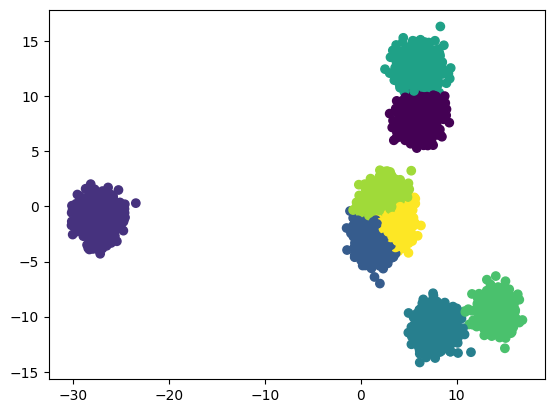

In [ ]:
from numpy import linalg
import numpy as np
X = data
X = X - X.mean(axis=0)
U, S, VT = linalg.svd(X)
x = X @ VT[0]
y = X @ VT[1]

kmeans = KMeans(n_clusters =8)
model = np.column_stack((x, y))
kmeans.fit(model)#학습
labels = kmeans.labels_
plt.scatter(x,y,c=labels)
plt.show()